# Random Forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.<br>
Random Forest contains a number of decision tress which are provided subsets of original data(Row sampling, Feature sampling) and the takes **(i) average or median** in case of **regressor** and **(ii) majority vote** in case of **classifier**<br>
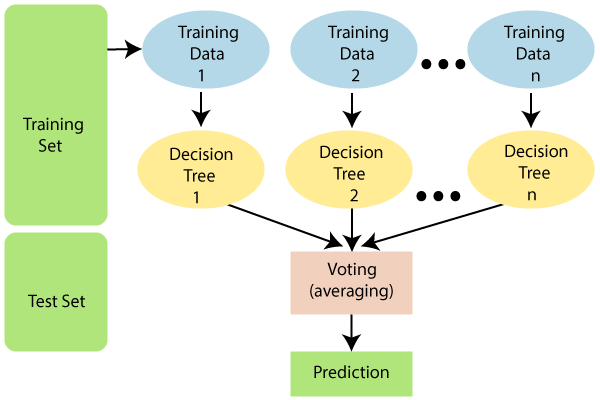
#### The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
#### How does Random Forest algorithm work?
Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.<br>
The Working process can be explained in the below steps and diagram:<br>
1. Select random K data points from the training set.
2. Build the decision trees associated with the selected data points (Subsets).
3. Choose the number N for decision trees that you want to build.
4. Repeat Step 1 & 2.
5. For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.<br>
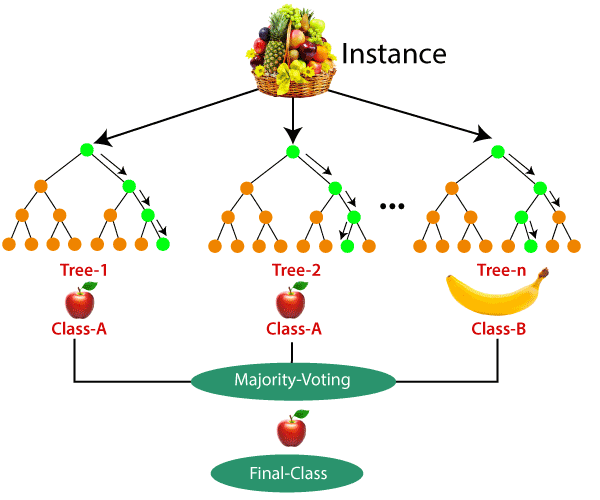<br>
### Why use Random Forest :
a) It takes less training time as compared to other algorithms.<br>
b) It predicts output with high accuracy, even for the large dataset it runs efficiently.<br>
c) It can also maintain accuracy when a large proportion of data is missing.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,accuracy_score

In [31]:
df=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df['species_num']=df['species'].factorize()[0]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [33]:
x=df.iloc[:,:-2]
y=df.species_num
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
#rf=RandomForestClassifier(n_estimators=2)
#rf.fit(x_train,y_train)
#y_pred=rf.predict(x_test)
#print('accuracy: ',accuracy_score(y_test,y_pred))
#print('classfication_report','\n',classification_report(y_test,y_pred))

In [36]:
# using grid earch CV to select best hyper parameters
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[2,5,10,20,50,60,80,100]}
rf_=RandomForestClassifier()
rf_cv=GridSearchCV(rf_,parameters,scoring='accuracy',cv=5)
rf_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 5, 10, 20, 50, 60, 80, 100]},
             scoring='accuracy')

In [37]:
print(rf_cv.best_params_)

{'n_estimators': 20}


In [38]:
y_pred=rf.predict(x_test)
print('accuracy: ',accuracy_score(y_test,y_pred))
print('classfication_report','\n',classification_report(y_test,y_pred))

accuracy:  1.0
classfication_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

